## __Frauenanteil der Bevölkerung zwischen 2000 und 2020__

 Gruppe: Miranda Downing, Elena Buchli

 ##### __Fragestellung:__ 
 
 - In welchen Ländern ist der Bevölkerungsanteil der Frauen zwischen 2000 und 2020 am meisten gesunken oder gestiegen?
 
 - Welche Gründe gibt es für die negativen Veränderungen? 

 ##### __Quellen:__
 
 - https://ourworldindata.org/gender-ratio
 - https://ourworldindata.org/migration Share of the population that was born in another country, Immigrants as a share of the total population. // Filter nach ausgewählten 
 Ländern


### __1. Daten beschaffen und laden__

#### 1.1 Hauptdatensatz

In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np
import matplotlib.cm as cm


In [2]:
df = pd.read_csv('share-population-female.csv', skiprows=1, 
                 names=['Gebiet','Code','Jahr','Anteil Population weiblich in %']) 
df.head()  

,Gebiet,Code,Jahr,Anteil Population weiblich in %
0,Afghanistan,AFG,1960,48.083054
1,Afghanistan,AFG,1961,48.165000
2,Afghanistan,AFG,1962,48.242370
3,Afghanistan,AFG,1963,48.315890
4,Afghanistan,AFG,1964,48.385273


#### 1.2 Datensatz zur Vertiefung der Analyse der Länder mit den stärksten Differenzen der Werte im Jahr 2020 im Vergleich zum Jahr 2000

In [3]:
df_immigration = pd.read_csv('share-of-the-population-that-was-born-in-another-country.csv', skiprows=1,
                           names=['Gebiet','Jahr','Anteil Immigranten in %'])
df_immigration.head()

,Gebiet,Jahr,Anteil Immigranten in %
0,British Virgin Islands,1990,45.943165
1,British Virgin Islands,1995,52.032940
2,British Virgin Islands,2000,63.791660
3,British Virgin Islands,2005,64.987450
4,British Virgin Islands,2010,61.433300


In [4]:
df_immigration_pivot = df_immigration.pivot(columns='Gebiet', index='Jahr', values='Anteil Immigranten in %')
df_immigration_pivot.head()

Gebiet,British Virgin Islands,Hong Kong,Maldives,Nepal,Northern Mariana Islands,Oman,Palau,Qatar
Jahr,,,,,,,,
1990,45.943165,38.730717,3.893636,2.274335,58.124233,16.775580,18.595234,65.036580
1995,52.032940,40.166077,7.283272,3.199030,70.579000,24.481745,27.678051,70.440186
2000,63.791660,40.402504,9.696631,2.998609,69.834470,27.496271,33.029730,60.711735
2005,64.987450,40.197994,14.094004,2.644172,66.390790,26.527145,30.544886,74.649704
2010,61.433300,39.905552,14.945178,2.154091,44.779602,26.837135,30.578144,78.456620


#### 1.3 Zusammenführen der zwei Datensätze

In [5]:
df_combined = pd.merge(df[['Gebiet', 'Jahr', 'Anteil Population weiblich in %']], 
                       df_immigration[['Gebiet', 'Jahr', 'Anteil Immigranten in %']], 
                       on=['Gebiet', 'Jahr'], 
                       how='inner')
df_combined.head()

,Gebiet,Jahr,Anteil Population weiblich in %,Anteil Immigranten in %
0,British Virgin Islands,1990,48.658512,45.943165
1,British Virgin Islands,1995,48.647730,52.032940
2,British Virgin Islands,2000,48.632114,63.791660
3,British Virgin Islands,2005,49.895733,64.987450
4,British Virgin Islands,2010,50.809260,61.433300


### __2. Daten vorbereiten__

- Der Datensatz ist im Longformat. 
- Für die Analyse werden die Daten pivotiert. In df.pivot beschreibt jede Zeile die Daten eines Gebiets und jede Spalte die Daten des entsprechenden Jahres in aufsteigender Reihenfolge. In df_pivot_switched beschreibt jede Zeile die Daten eines Jahres und jede Spalte die Daten des entsprechenden Gebiets in aufsteigender Reihenfolge.
- Folgende Datentypen kommen in unserem Datentyp vor: Gebiet und Code = Object, Jahr = Integer, Anteil Population weiblich in % = Float
- Die Daten der Gebiete "East Asia and Pacific (WB)",
    "Europe and Central Asia (WB)",
    "European Union (27)",
    "High-income countries",
    "Latin America and Caribbean (WB)",
    "Lower-middle-income countries",
    "Low-income countries",
    "Middle East and North Africa (WB)",
    "Middle-income countries",
    "North America (WB)",
    "South Asia (WB)",
    "Sub-Saharan Africa (WB)", 
    "Upper-middle-income countries", 
    "World"
wurden aus dem Datensatz herausgefiltert, da sie den Vergleich der Länder verfälschen könnten.


In [6]:
zu_entfernende_gebiete =  [
    "East Asia and Pacific (WB)",
    "Europe and Central Asia (WB)",
    "European Union (27)",
    "High-income countries",
    "Latin America and Caribbean (WB)",
    "Lower-middle-income countries",
    "Low-income countries",
    "Middle East and North Africa (WB)",
    "Middle-income countries",
    "North America (WB)",
    "South Asia (WB)",
    "Sub-Saharan Africa (WB)",
    "Upper-middle-income countries",
    "World"
]
df_filtered=df[~df['Gebiet'].isin(zu_entfernende_gebiete)]
df_filtered

,Gebiet,Code,Jahr,Anteil Population weiblich in %
0,Afghanistan,AFG,1960,48.083054
1,Afghanistan,AFG,1961,48.165000
2,Afghanistan,AFG,1962,48.242370
3,Afghanistan,AFG,1963,48.315890
4,Afghanistan,AFG,1964,48.385273
...,...,...,...,...
14548,Zimbabwe,ZWE,2018,52.923756
14549,Zimbabwe,ZWE,2019,52.900196
14550,Zimbabwe,ZWE,2020,52.869328
14551,Zimbabwe,ZWE,2021,52.832848


In [7]:
df_filtered[df_filtered['Gebiet'].isin(zu_entfernende_gebiete)]

,Gebiet,Code,Jahr,Anteil Population weiblich in %


In [8]:
df_pivot = df_filtered.pivot(index='Gebiet', columns='Jahr', values='Anteil Population weiblich in %')
df_pivot.head()

Jahr,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
Gebiet,,,,,,,,,,,,,,,,,,,,,
Afghanistan,48.083054,48.165000,48.242370,48.315890,48.385273,48.450287,48.511803,48.570465,48.626003,48.677998,...,49.442104,49.432137,49.423183,49.414608,49.419285,49.437210,49.455486,49.470943,49.488403,49.508720
Albania,48.797123,48.769444,48.734352,48.691364,48.642930,48.592712,48.542490,48.491707,48.440876,48.390232,...,49.840595,49.837696,49.842410,49.856564,49.878532,49.906067,49.939330,49.988052,50.049040,50.117737
Algeria,49.568150,49.549220,49.444250,49.317616,49.144753,48.956123,48.868008,48.871320,48.872444,48.872456,...,49.024277,49.030834,49.037370,49.041508,49.044548,49.048107,49.053470,49.063175,49.075874,49.085533
American Samoa,48.648247,48.671580,48.716620,48.763042,48.812675,48.882050,48.926292,48.941566,48.972977,49.037730,...,49.757523,49.824768,49.892930,49.968285,50.061660,50.161076,50.265210,50.375630,50.507380,50.592910
Andorra,49.454624,49.236492,49.046670,48.847030,48.660362,48.492220,48.301937,48.034298,47.754550,47.520190,...,49.496265,49.528770,49.559560,49.507860,49.373620,49.248800,49.123035,49.014156,48.932106,48.905090


In [9]:
df_pivot_switched = df_filtered.pivot(columns='Gebiet', index='Jahr', values='Anteil Population weiblich in %')
df_pivot_switched.head()

Gebiet,Afghanistan,Albania,Algeria,American Samoa,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Aruba,...,United States,United States Virgin Islands,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,Yemen,Zambia,Zimbabwe
Jahr,,,,,,,,,,,,,,,,,,,,,
1960,48.083054,48.797123,49.568150,48.648247,49.454624,49.843790,52.338190,49.918377,51.441326,50.858850,...,50.438736,49.624176,49.913860,51.557724,46.093365,49.512570,50.823933,50.090168,50.488903,50.503876
1961,48.165000,48.769444,49.549220,48.671580,49.236492,49.700947,52.294426,49.974580,51.396935,50.850190,...,50.491130,48.948513,49.950275,51.480007,46.239956,49.538395,50.817980,50.133510,50.508675,50.528305
1962,48.242370,48.734352,49.444250,48.716620,49.046670,49.673798,52.269855,50.016743,51.358770,50.845066,...,50.549380,49.090570,49.984783,51.401867,46.377450,49.562202,50.815567,50.186115,50.527843,50.550846
1963,48.315890,48.691364,49.317616,48.763042,48.847030,49.634980,52.253452,50.059998,51.323560,50.836014,...,50.604240,49.216362,50.017612,51.328310,46.508522,49.585060,50.816400,50.251670,50.546440,50.571873
1964,48.385273,48.642930,49.144753,48.812675,48.660362,49.576790,52.273968,50.103413,51.292590,50.826775,...,50.657406,49.329590,50.052970,51.258880,46.637608,49.605910,50.822308,50.307583,50.566364,50.592113


### __3. Statistik der Rohdaten (Analyse im Long-Format)__

Über die einzelnen Spalten kann folgendes gesagt werden:
- Die Variabeln sind kontinuierlich.
- Die Spalte Gebiete enthält 217 verschieden Gebiete.
- Die Spalte Codes enthält 217 verschiedene Codes.
- Es sind Daten zwischen den Jahren 1960 and 2022 mit 63 Datenpunkten von allen Gebieten vollständig vorhanden. Daher wurde keine zusätzliche Auswertung der Gebiete mit den meisten oder wenigsten Datenpunkte erstellt.
- Der weibliche Anteil der Population streut zwischen 23.39% und 55.94%.

In [10]:
df_filtered.dtypes

Gebiet                              object
Code                                object
Jahr                                 int64
Anteil Population weiblich in %    float64
dtype: object

#### 3.1 Analyse der Gebiete

In [11]:
print('Anzahl verschiedener Gebiete: ', len(df_filtered['Gebiet'].unique()))

Anzahl verschiedener Gebiete:  217


In [12]:
df_filtered['Gebiet'].value_counts()

Gebiet
Afghanistan      63
Pakistan         63
Netherlands      63
New Caledonia    63
New Zealand      63
                 ..
Gibraltar        63
Greece           63
Greenland        63
Grenada          63
Zimbabwe         63
Name: count, Length: 217, dtype: int64

<Axes: title={'center': 'Anzahl Datenpunkte pro Gebiet'}, xlabel='Gebiet', ylabel='Anzahl Datenpunkte'>

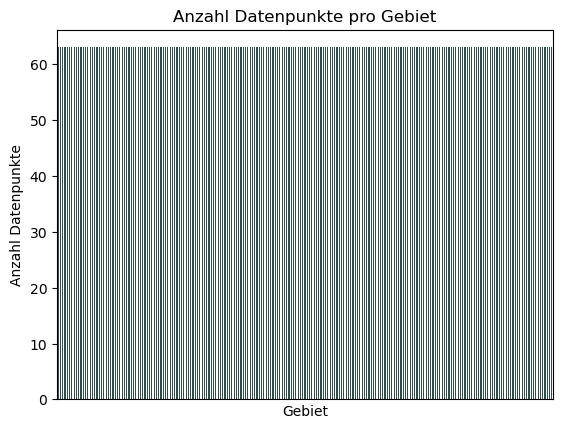

In [13]:
df_filtered['Gebiet'].value_counts().plot(kind='bar', 
                                 xticks=[],
                                 ylabel='Anzahl Datenpunkte', title='Anzahl Datenpunkte pro Gebiet',
                                 color='darkslategrey')

#### 3.2 Anzahl der Codes

In [14]:
print('Anzahl verschiedene Codes: ', len(df_filtered['Code'].unique()))

Anzahl verschiedene Codes:  217


In [15]:
df_filtered['Code'].value_counts()

Code
AFG    63
PAK    63
NLD    63
NCL    63
NZL    63
       ..
GIB    63
GRC    63
GRL    63
GRD    63
ZWE    63
Name: count, Length: 216, dtype: int64

<Axes: title={'center': 'Anzahl Datenpunkte pro Code'}, xlabel='Code', ylabel='Anzahl Datenpunkte'>

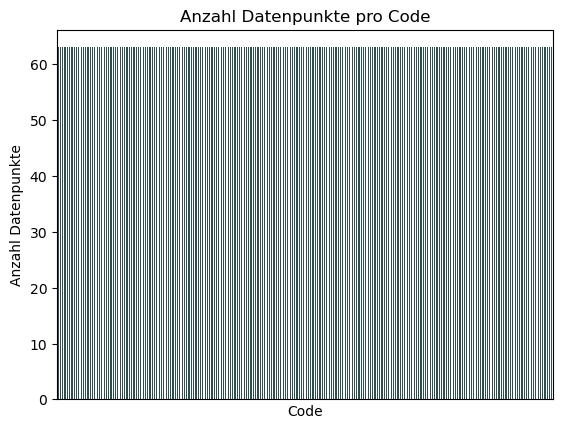

In [16]:
df_filtered['Code'].value_counts().plot(kind='bar',xticks=[], 
                                        ylabel='Anzahl Datenpunkte', 
                                        title='Anzahl Datenpunkte pro Code',
                                        color='darkslategrey')

#### 3.3 Analyse der Jahre

In [17]:
print('Anzahl verschiedener Jahre: ', len(df_filtered['Jahr'].unique()))

Anzahl verschiedener Jahre:  63


#### 3.4 Analyse der Datenpunkte pro Jahr

In [18]:
df_filtered['Jahr'].value_counts().sort_index()

Jahr
1960    217
1961    217
1962    217
1963    217
1964    217
       ... 
2018    217
2019    217
2020    217
2021    217
2022    217
Name: count, Length: 63, dtype: int64

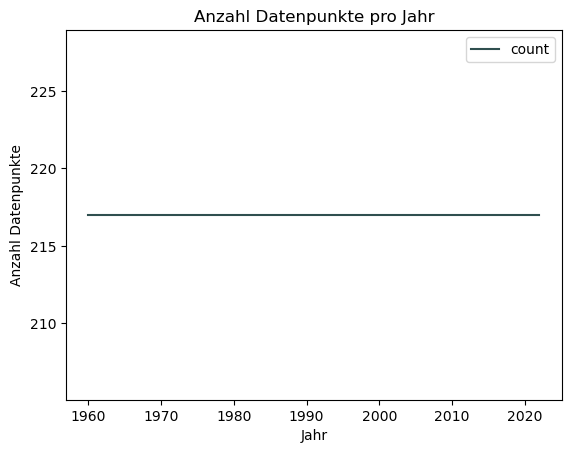

In [19]:
g = df_filtered['Jahr'].value_counts().sort_index().plot(ylabel='Anzahl Datenpunkte', 
                                                         title='Anzahl Datenpunkte pro Jahr',
                                                         color='darkslategrey')
g.legend()

#### 3.5 Analyse des weiblichen Anteils der Population in %

In [20]:
x=df_filtered["Anteil Population weiblich in %"].describe()
pd.DataFrame(x)

,Anteil Population weiblich in %
count,13671.000000
mean,50.053290
std,2.567333
min,23.394217
25%,49.503991
50%,50.336970
75%,51.156237
max,55.943850


<Axes: title={'center': 'Boxplot des weiblichen Anteils der Population'}, xlabel='Anteil Population weiblich in %'>

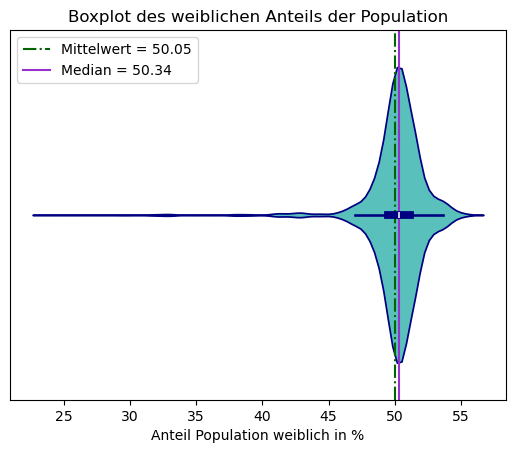

In [21]:
g = df_filtered['Anteil Population weiblich in %'].plot(kind='box', vert=False, 
        title='Boxplot des weiblichen Anteils der Population', 
        xlabel='Anteil Population weiblich in %')

mean = df_filtered['Anteil Population weiblich in %'].mean()
g.axvline(x=mean, color='darkgreen', linestyle='-.', label=f'Mittelwert = {mean:.2f}')

median = df_filtered['Anteil Population weiblich in %'].median()
g.axvline(x=median, color='darkorchid', linestyle='-', label=f'Median = {median:.2f}')

g.legend()

sns.violinplot(x=df_filtered['Anteil Population weiblich in %'], density_norm='count', color='mediumturquoise', linecolor='navy')

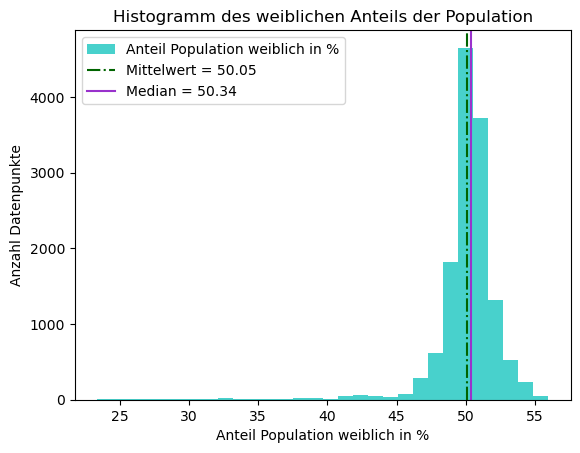

In [22]:
g = df_filtered['Anteil Population weiblich in %'].plot(kind='hist', bins=30, title='Histogramm des weiblichen Anteils der Population', 
                           xlabel='Anteil Population weiblich in %', ylabel='Anzahl Datenpunkte', color='mediumturquoise')
mean = df_filtered['Anteil Population weiblich in %'].mean()
g.axvline(x=df_filtered['Anteil Population weiblich in %'].mean(), color='darkgreen', 
          linestyle='-.', label=f'Mittelwert = {mean:.2f}')

median = df_filtered['Anteil Population weiblich in %'].median()
g.axvline(x=df_filtered['Anteil Population weiblich in %'].median(), 
          color='darkorchid',label=  f'Median = {median:.2f}')

g.legend()

### __4. Analyse__
#### 4.1 Vorgehen
- Berechnung der Differenz des Frauenanteils der Population der einzelenen Gebiete im Jahr 2020 im Vergleich zum Jahr 2000.
- Darstellung der Auswahl der Gebiete mit den grössten und kleinsten Differenzen.
- Weiterer Datensatz hinzugefügt um Gründe der tiefen Frauenanteilen in diesen Gebieten im Zusammenhang mit Migration darzustellen.
- Darstellung der Daten des 2. Datensatzes für die ausgewählten Gebiete mit tiefer Frauenrate.
- Gemeinsamer Plot der zwei Datensätze zu den ausgewählten Gebieten mit tiefer Frauenrate.

#### 4.2 Beobachtungen
- Die Population der folgenden Länder zeigen die stärkste Reduktion des Frauenanteils in den untersuchten 20 Jahren um mehr als 4 Prozentpunkte: Nördliche Marianen, Malediven, Qatar, Oman.
- Die Population der folgenden Länder zeigen die stärkste Zunahme des Frauenanteils in den untersuchten 20 Jahren um mehr als 2 Prozentpunkte: Palau, Nepal, Hong Kong, Britische Jungferninseln.
- Bei den Ländern mit den stärksten negativen Veränderungen zeigt sich eine Korrelation zwischen Migration und Frauenanteil. 

#### 4.3 Interpretation
Die Länder mit der grössten prozentualen Zunahme des Frauenanteils liegen alle, bis auf die britischen Jungferninseln, in Asien. Die Gründe für eine positive Entwicklung der Frauenrate scheinen in den meisten Ländern dieselben zu sein: Längere Lebenserwartungen von Frauen, sinkende Geburtenrate, Migration aufgrund des Arbeitsmarktes und Verbesserung des Gesundheitswesens und der Bildung. Weshalb genau diese Länder eine besonders starke Zunahme aufweisen ist schwierig zusammenzufassen.

Die starke negative Entwicklung der Frauenpopulation in den nördlichen Marianen lässt sich hingegen klar begründen. Aufgrund eines Zusammenbruchs der Textilindustrie der Insel wurden viele von Frauen besetzte Arbeitsplätze abgeschafft. Infolgedessen wanderten viele Frauen in die USA oder andere asiatische Länder aus. Parallel dazu fand eine Arbeitsmigration von Männern im Bau- oder Tourismusgewerbe aus dem asiatischen Raum auf die Marianen statt.

Die Arbeitsmigration von Männern ist bei den Malediven, Qatar und Oman ebenfalls der Grund für die sinkende Frauenrate. Sie arbeiten dort in der Öl, Gas oder Bau Branche.
Die Staatsreligion dieser Länder ist der Islam, welcher dort auch streng praktiziert wird. Frauen aus streng gläubigen islamischen Familien dürfen nur Arbeiten nachgehen, welche im Einklang mit dem Islam sind, unteranderem sind Interaktionen mit Männern ausserhalb der Familie untersagt. Generell herrscht in diesen Ländern ein traditionelles Familienbild, bei dem sich die Frau primär um die Kinder und den Haushalt kümmert.
Frauen, welche sich gegen diese Lebensform entscheiden wandern oft aus, um Bildungschancen oder andere Möglichkeiten wahrzunehmen. 

Bei den Ländern mit der stärksten negativen Entwicklung sieht man eine klare Korrelation zwischen Immigration und Frauenanteil. Sie zeigt, dass Frauen ebenfalls immigrieren und so zu einem Anstieg der weiblichen Population innerhalb der Länder führen. Diese Zunahme reicht jedoch nicht um die prozentuale Differenz der beiden Geschlechter zu kompensieren.

##### 4.3.1 Quellen Interpretation
 - https://de.wikipedia.org/wiki/N%C3%B6rdliche_Marianen
 - https://de.wikipedia.org/wiki/Arbeitsmigranten_in_Katar
 - https://de.wikipedia.org/wiki/Oman
 - https://www.dw.com/de/frauenrechte-in-muslimischen-l%C3%A4ndern/a-40724368
 - https://de.wikipedia.org/wiki/Liste_der_L%C3%A4nder_nach_Geschlechterverteilung
 - https://www.destatis.de/DE/Themen/Querschnitt/Demografischer-Wandel/_inhalt.html?utm_source=chatgpt.com
 - https://dam-api.bfs.admin.ch/hub/api/dam/assets/17304277/master?utm_source=chatgpt.com

### __5. Berechnungen__

#### 5.1 Berechnung der Differenzen

In [23]:
diffs= df_pivot[2020]-df_pivot[2000]
diffs= diffs.sort_values()
diffs

Gebiet
Northern Mariana Islands    -6.142812
Maldives                    -6.106927
Qatar                       -5.488384
Oman                        -4.763586
Sint Maarten (Dutch part)   -4.539051
                               ...   
Armenia                      2.117164
Palau                        2.407177
Nepal                        2.844287
Hong Kong                    3.127697
British Virgin Islands       3.163422
Length: 217, dtype: float64

#### 5.2 Darstellung der Differenzen

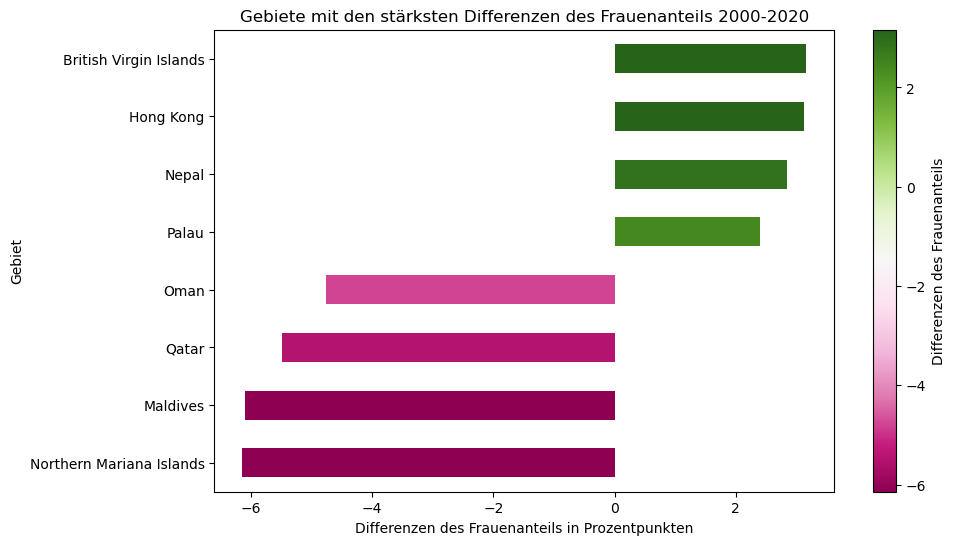

In [24]:
diff_sel = (diffs < -4.6) | (diffs > 2.2)

norm = plt.Normalize(diffs[diff_sel].min(), diffs[diff_sel].max())
colors = cm.PiYG(norm(diffs[diff_sel]))

ax = diffs[diff_sel].plot(
    kind='barh',
    color=colors,
    title='Gebiete mit den stärksten Differenzen des Frauenanteils 2000-2020',
    xlabel='Differenzen des Frauenanteils in Prozentpunkten',
    figsize=(10, 6))

sm = cm.ScalarMappable(cmap='PiYG', norm=norm)
sm.set_array([]) 

cbar = plt.colorbar(sm, ax=ax.figure.axes, label='Differenzen des Frauenanteils')

plt.show()

#### 5.3 Liste der Gebiete mit den grössten und kleinsten Differenzen

In [25]:
Gebiets_liste = diffs[diff_sel].index.tolist()
print(Gebiets_liste)

['Northern Mariana Islands', 'Maldives', 'Qatar', 'Oman', 'Palau', 'Nepal', 'Hong Kong', 'British Virgin Islands']


#### 5.4 Plot: Frauenanteil der Länder mit der höchsten Zunahme und höchsten Abnahme im Vergleich

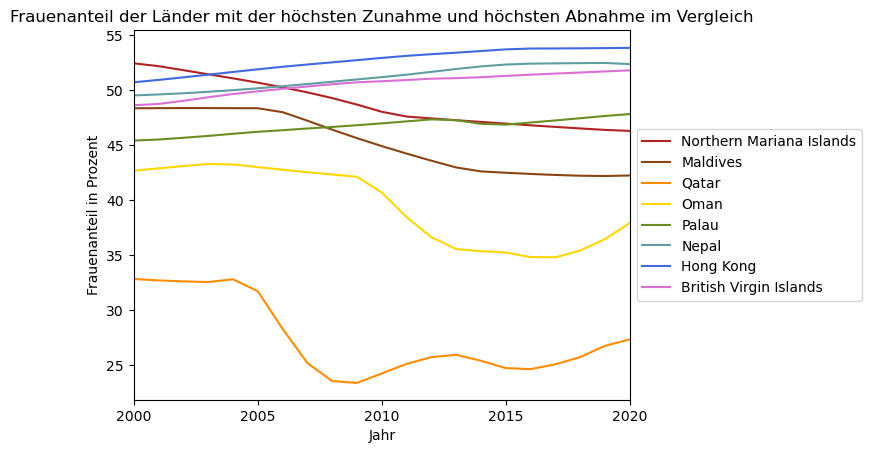

In [26]:
custom_colors=['firebrick','saddlebrown','darkorange','gold','olivedrab','cadetblue','royalblue','orchid']

df_vergleich=df_pivot_switched[['Northern Mariana Islands', 'Maldives', 'Qatar', 'Oman', 'Palau', 'Nepal', 
                                'Hong Kong', 'British Virgin Islands']]
ax = df_vergleich.plot (ylabel='Frauenanteil in Prozent',
                        title='Frauenanteil der Länder mit der höchsten Zunahme und höchsten Abnahme im Vergleich',
                        xlim=[2000, 2020],
                        color=custom_colors)
ax.set_xticks(range(2000, 2021, 5))
ax.legend(loc='center left', bbox_to_anchor=(1.0, 0.5)) 

#### 5.5 Plot: Analyse der Veränderungen des Anteils an Immigranten der Gebiete mit grossen Differenzen der Frauenraten

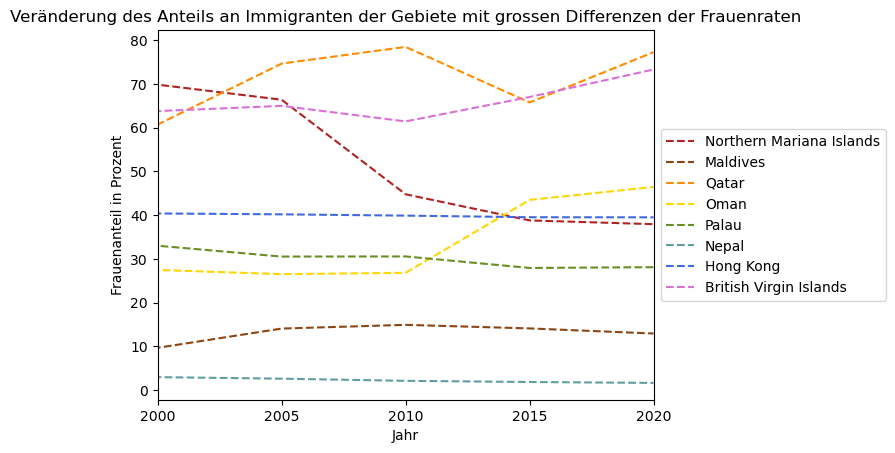

In [27]:
custom_colors=['firebrick','saddlebrown','darkorange','gold','olivedrab','cadetblue','royalblue','orchid']

df_vergleich_immigration=df_immigration_pivot[['Northern Mariana Islands', 'Maldives', 'Qatar', 'Oman', 'Palau', 'Nepal', 
                                'Hong Kong', 'British Virgin Islands']]
ax = df_vergleich_immigration.plot (ylabel='Frauenanteil in Prozent',
                        title='Veränderung des Anteils an Immigranten der Gebiete mit grossen Differenzen der Frauenraten',
                        xlim=[2000, 2020], linestyle='dashed',
                        color=custom_colors)
ax.set_xticks(range(2000, 2021, 5))
ax.legend(loc='center left', bbox_to_anchor=(1.0, 0.5)) 

#### 5.6 Finaler Plot: Darstellung der Veränderungen der Frauenrate im Vergleich zum Anteil an Immigranten der Gebiete mit starker Abnahme der Frauenrate

In [28]:
selected_countries = ['Oman', 'Qatar', 'Maldives', 'Northern Mariana Islands']
df_selected = df_combined[df_combined['Gebiet'].isin(selected_countries)]

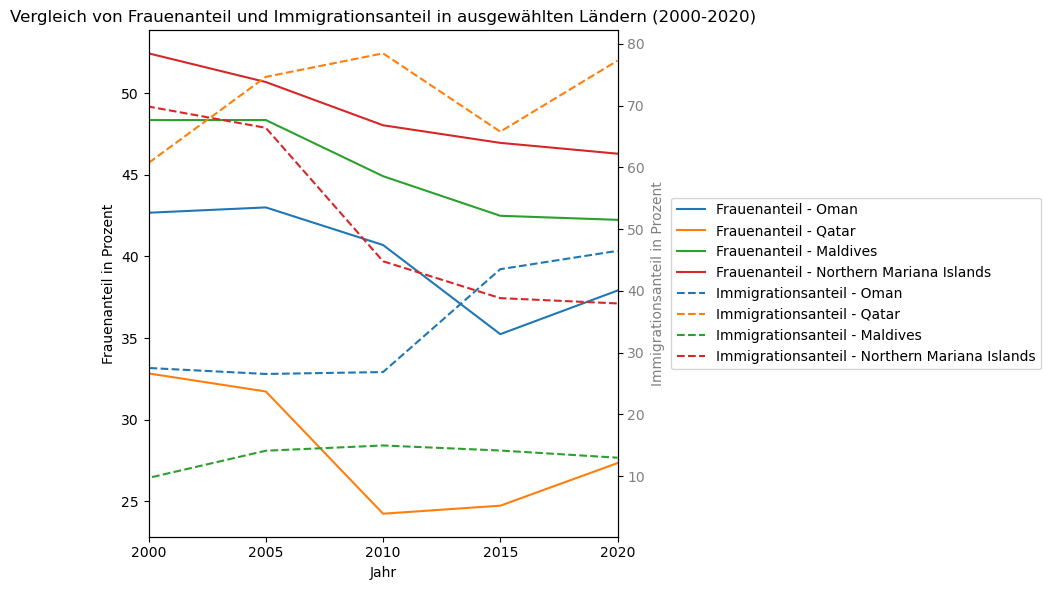

In [30]:
fig, ax1 = plt.subplots(figsize=(10, 6))

ax1.set_title('Vergleich von Frauenanteil und Immigrationsanteil in ausgewählten Ländern (2000-2020)')

for country in selected_countries:
    subset = df_selected[df_selected['Gebiet'] == country]
    ax1.plot(subset['Jahr'], subset['Anteil Population weiblich in %'], label=f'Frauenanteil - {country}')
ax1.set_ylabel('Frauenanteil in Prozent', color='black')
ax1.set_xlabel('Jahr')
ax1.tick_params(axis='y', labelcolor='black')
ax1.set_xticks(range(2000, 2021, 5))
ax1.set_xlim([2000, 2020])

ax2 = ax1.twinx()
for country in selected_countries:
    subset = df_selected[df_selected['Gebiet'] == country]
    ax2.plot(subset['Jahr'], subset['Anteil Immigranten in %'], linestyle='dashed', label=f'Immigrationsanteil - {country}')
ax2.set_ylabel('Immigrationsanteil in Prozent', color='gray')
ax2.tick_params(axis='y', labelcolor='gray')

lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
ax1.legend(lines_1 + lines_2, labels_1 + labels_2, loc='center left', bbox_to_anchor=(1.1, 0.5))

fig.tight_layout()
plt.show()